 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_data = Path("Resources\whale_returns.csv")
whale_returns = pd.read_csv(whale_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
"""dfObj = pd.DataFrame(whale_returns, columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC"])

dfObj.isnull()

dfObj.isnull().sum().sum()

count = dfObj.isnull().sum().sum()"""

whale_returns.isna()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [4]:


"""for i in range(len(dfObj.index)) :
                    print("Nan in row", i, ":",dfObj.iloc[i].isnull() .sum())
Nan = ("Nan in row", i, ":",dfObj.iloc[i].isnull() .sum())                   

print(count)"""


'for i in range(len(dfObj.index)) :\n                    print("Nan in row", i, ":",dfObj.iloc[i].isnull() .sum())\nNan = ("Nan in row", i, ":",dfObj.iloc[i].isnull() .sum())                   \n\nprint(count)'

In [5]:
# Drop nulls
whale_returns.dropna()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(100)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [7]:
# Count nulls
algo_returns.isna

<bound method DataFrame.isna of               Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1241 rows x 2 columns]>

In [8]:
# Drop nulls
algo_returns.dropna()
algo_returns = algo_returns.dropna()
print(algo_returns)


              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1235 rows x 2 columns]


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
data = []

In [10]:
# Reading S&P 500 Closing Prices
sp500_history = Path("Resources/sp500_history.csv")
sp500_Closing_Prices = pd.read_csv(sp500_history, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_Closing_Prices.sort_index(inplace = True)
sp500_Closing_Prices.head()

SP_Close = sp500_Closing_Prices
print(SP_Close)

               Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93
...              ...
2019-04-16  $2907.06
2019-04-17  $2900.45
2019-04-18  $2905.03
2019-04-22  $2907.97
2019-04-23  $2933.68

[1649 rows x 1 columns]


In [11]:
# Check Data Types
SP_Close.dtypes


Close    object
dtype: object

In [12]:
# Fix Data Types
SP_Close = SP_Close.copy()
SP_Close["Close"] = SP_Close["Close"].str.replace("$", "")
SP_Close.head()







C:\Users\Jamel\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [13]:
# Calculate Daily Returns

SP_Close["Close"] = SP_Close["Close"].astype("float64")
SP_Close["Close"] = SP_Close["Close"].pct_change()
SP_Close.head()



,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop nulls
SP_Close.dropna(inplace=True)
SP_Close.isnull().sum()

Close    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.
SP_Close.columns = ["S&P 500 Daily Close"]
SP_Close.head()

,S&P 500 Daily Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
daily_oringinal_returns = pd.concat([whale_returns, algo_returns, SP_Close], axis = "columns",join = "inner")
print(daily_oringinal_returns)





            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 ...   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-02                          NaN             

---

In [17]:
#daily_oringinal_returns.dropna()



# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [18]:
#Plot daily returns of all portfolios
#daily_returns_of_all_assets = df.pct_change
#df.head() 
#df.dropna()

daily_oringinal_returns.pct_change
#daily_oringinal_returns.dropna()
daily_oringinal_returns

                            


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Close
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [19]:
columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1 ", "Algo 2", "S&P_Close"]
daily_oringinal_returns.columns = columns
daily_oringinal_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_Close
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

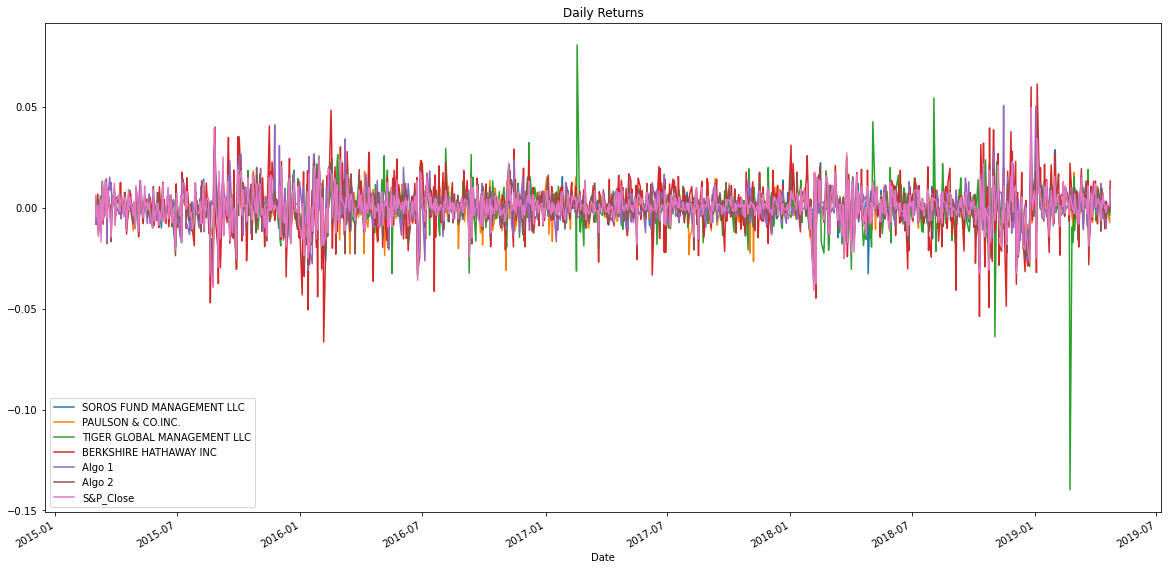

In [20]:
#combined_returns.plot( title="Daily Returns" , figsize=(20,10))
#df['daily_return'] = df['close'].pct_change()
daily_oringinal_returns.plot(title="Daily Returns" , figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [21]:
# Calculate cumulative returns of all portfolios

cumulative_returns = daily_oringinal_returns.cumsum()
cumulative_returns.head()







,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_Close
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.010100,0.002251,0.001586
2015-03-04,0.000964,-0.001739,-0.003030,-0.002356,-0.018689,0.004667,-0.002802
2015-03-05,0.004980,0.002337,-0.000675,0.004371,-0.019644,0.008990,-0.001606
2015-03-06,-0.002925,-0.001237,-0.009156,-0.008727,-0.024600,-0.002470,-0.015780


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'portfolio Risk'}>

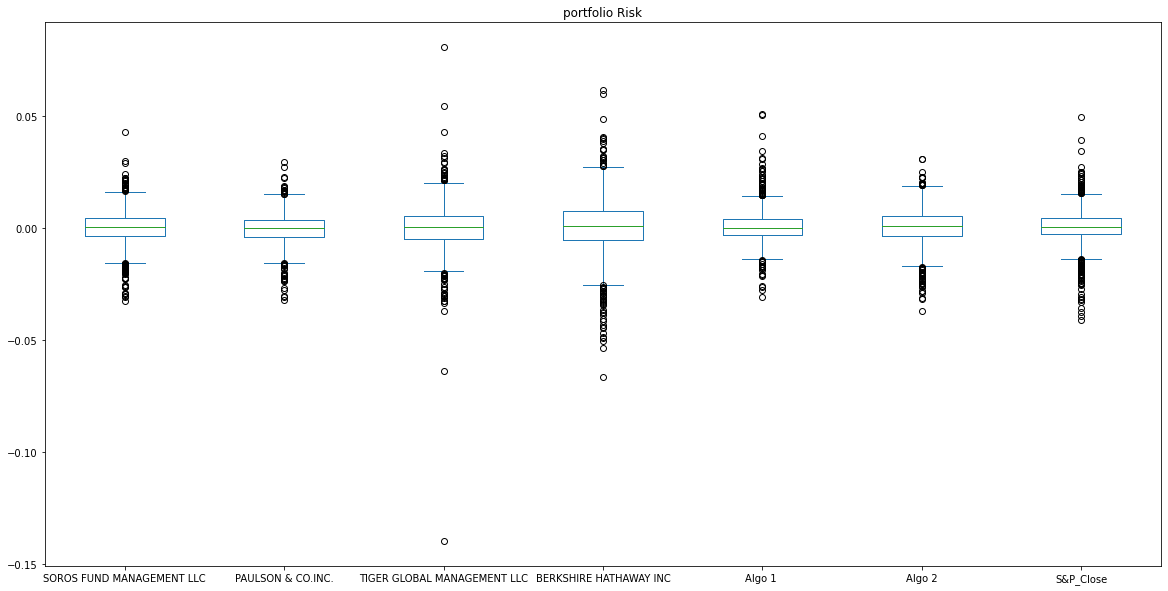

In [22]:
# Box plot to visually show risk
daily_oringinal_returns.plot.box(title= "portfolio Risk", figsize=(20,10))

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
daily_oringinal_returns_std = daily_oringinal_returns.std().sort_values(ascending=False)
print(daily_oringinal_returns.std().sort_values(ascending=False))




BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P_Close                      0.008551
Algo 2                         0.008339
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007621
PAULSON & CO.INC.              0.007023
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [28]:
# Calculate  the daily standard deviation of S&P 500
SP_Close_std = SP_Close.std().sort_values(ascending=False)
print(SP_Close_std)





S&P 500 Daily Close    0.008111
dtype: float64


In [29]:
# Determine which portfolios are riskier than the S&P 500
#daily_std = 0.008111

vol = cumulative_returns.std()
print(vol)



SOROS FUND MANAGEMENT LLC      0.075400
PAULSON & CO.INC.              0.092969
TIGER GLOBAL MANAGEMENT LLC    0.132899
BERKSHIRE HATHAWAY INC         0.223493
Algo 1                         0.180277
Algo 2                         0.129467
S&P_Close                      0.136557
dtype: float64


In [30]:
vol.loc[vol > 0.2]
                  


BERKSHIRE HATHAWAY INC    0.223493
dtype: float64

In [31]:
# Calculate the annualized standard deviation (252 trading days)


annual_returns = daily_oringinal_returns.mean() * 252
#Show data
annual_returns

SOROS FUND MANAGEMENT LLC      0.044672
PAULSON & CO.INC.             -0.053912
TIGER GLOBAL MANAGEMENT LLC   -0.020936
BERKSHIRE HATHAWAY INC         0.127519
Algo 1                         0.164642
Algo 2                         0.067104
S&P_Close                      0.089420
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day STD of All Returns'}, xlabel='Date'>

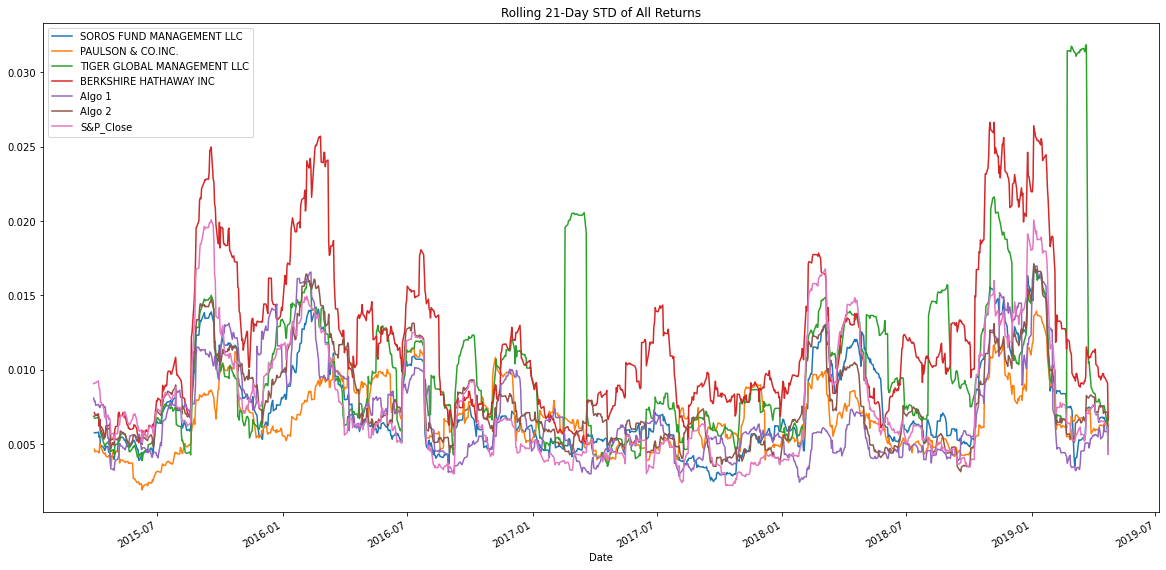

In [34]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
daily_oringinal_returns_std = daily_oringinal_returns.rolling(window=21).std()
#print(daily_retruns_of_all_assets.rolling(window=21).std())

# Plot the rolling standard deviation
daily_oringinal_returns_std.plot(figsize=(20, 10), title='Rolling 21-Day STD of All Returns')


### Calculate and plot the correlation

In [42]:
# Calculate the correlation
correlation = daily_oringinal_returns.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.287650,0.278505
Algo 2,0.826873,0.678152,0.507414,0.688082,0.287650,1.000000,0.858753
S&P_Close,0.837864,0.669732,0.623946,0.751371,0.278505,0.858753,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [40]:
# Calculate covariance of a single portfolio
algo_covariance = algo_returns.cov()
algo_covariance




,Algo 1,Algo 2
Algo 1,0.000064,0.000023
Algo 2,0.000023,0.000072


In [41]:
# Calculate variance of S&P 500
covariance = SP_Close.cov()
covariance

,S&P 500 Daily Close
S&P 500 Daily Close,0.000066


In [48]:
# Computing beta SP 500 and Algo
# Find covariance of both Algo and SP 500

# Create a new pivot table where the columns are the closing prices for each ticker
combined_Algo_SP_df = pd.concat([algo_returns, SP_Close], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)

combined_Algo_SP_df.sort_index(axis="columns", ascending=True, inplace=False)


# Set column names to "Algo 1", "Algo 2", "S&P 500"
combined_Algo_SP_df.columns = ["Algo 1", "Algo 2", "S&P 500"]
print(combined_Algo_SP_df.columns)




Index(['Algo 1', 'Algo 2', 'S&P 500'], dtype='object')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [51]:
# Use `ewm` to calculate the rolling window

daily_oringinal_returns.ewm(halflife=21).std().dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_Close
Date,,,,,,,
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.003724,0.002197,0.006062
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004036,0.002271,0.005039
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003466,0.006589,0.007630
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.003084,0.005902,0.007440
2015-03-10,0.005816,0.004707,0.006864,0.007841,0.003127,0.007092,0.008928
...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007837
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007736
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007610


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [52]:
# Annualized Sharpe Ratios
sharpratios=(daily_oringinal_returns.mean()*252)/(daily_oringinal_returns.std()*np.sqrt(252))
sharpratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.360829
Algo 2                         0.506929
S&P_Close                      0.658706
dtype: float64

<AxesSubplot:title={'center':'sharpratios'}>

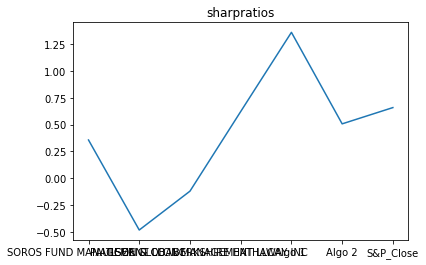

In [53]:
# Visualize the sharpe ratios as a bar plot
sharpratios.plot(title='sharpratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [54]:
# Reading data from 1st stock, Bitfarms Ltd.(BITF)

BITF_Close_Prices_csv = Path("Resources\BITF _Close_Prices.csv")
BITF_Close_Prices_data = pd.read_csv(BITF_Close_Prices_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
BITF_Close_Prices_data.sort_index(inplace = True)
BITF_Close_Prices_data.head()








,BITF_Close_Prices
Date,
2021-10-13,5.03
2021-10-14,5.00
2021-10-15,5.38
2021-10-18,5.60
2021-10-19,5.68


In [55]:
# Reading data from 2nd stock, MicroStrategy (MSTR)

MSTR_Close_Prices_csv = Path("Resources\MSTR_Close_Prices.csv")
MSTR_Close_Prices_data = pd.read_csv(MSTR_Close_Prices_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
MSTR_Close_Prices_data.sort_index(inplace = True)
MSTR_Close_Prices_data.head()





,MSTR_Close_Price
Date,
2021-10-13,726.30
2021-10-14,723.95
2021-10-15,749.85
2021-10-18,739.64
2021-10-19,727.25


In [56]:
# Reading data from 3rd stock, Grayscale Bitcoin Trust (GBTC)
GBTC_Close_Prices_csv = Path("Resources\GBTC _Close_Prices.csv")
GBTC_Close_Prices_data = pd.read_csv(GBTC_Close_Prices_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
GBTC_Close_Prices_data.sort_index(inplace = True)
GBTC_Close_Prices_data.head()

,GBTC_Close_Prices
Date,
2022-01-03,34.27
2022-01-04,34.66
2022-01-05,32.49
2022-01-06,31.94
2022-01-07,30.74


In [57]:
# Combine all stocks in a single DataFrame
Joined_Custom_org_df = pd.concat([BITF_Close_Prices_data, MSTR_Close_Prices_data, GBTC_Close_Prices_data], axis="columns", join="inner")
Joined_Custom_org_df.head(5)





,BITF_Close_Prices,MSTR_Close_Price,GBTC_Close_Prices
Date,,,
2022-01-03,5.05,558.26,34.27
2022-01-04,5.22,551.07,34.66
2022-01-05,4.68,509.10,32.49
2022-01-06,4.53,498.62,31.94
2022-01-07,4.29,482.95,30.74


In [58]:
# Calculate daily returns
Joined_Custom_org_df_daily_returns = Joined_Custom_org_df.pct_change()


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [60]:
BITF_weight = 0.3
MSTR_weight = 0.3
GBTC_weight = 0.3

In [62]:
custom_portfolio__weighted_returns = (BITF_weight * Joined_Custom_org_df)  + (MSTR_weight * Joined_Custom_org_df) + (GBTC_weight * Joined_Custom_org_df)
custom_portfolio__weighted_returns.head(5)

,BITF_Close_Prices,MSTR_Close_Price,GBTC_Close_Prices
Date,,,
2022-01-03,4.545,502.434,30.843
2022-01-04,4.698,495.963,31.194
2022-01-05,4.212,458.190,29.241
2022-01-06,4.077,448.758,28.746
2022-01-07,3.861,434.655,27.666


In [68]:
# Reset Date index
Joined_Custom_org_df = Joined_Custom_org_df.reset_index()





In [73]:
# Reorganize portfolio data by having a column per symbol

Joined_Custom_org_df_daily_returns.columns = ["BITF", "MSTR", "GBTC"]
print(Joined_Custom_org_df_daily_returns)


                BITF      MSTR      GBTC
Date                                    
2022-01-03       NaN       NaN       NaN
2022-01-04  0.033663 -0.012879  0.011380
2022-01-05 -0.103448 -0.076161 -0.062608
2022-01-06 -0.032051 -0.020585 -0.016928
2022-01-07 -0.052980 -0.031427 -0.037570
2022-01-10  0.004662 -0.002071 -0.018543
2022-01-11  0.092807  0.051063  0.032483
2022-01-12  0.048832  0.015951  0.025682
2022-01-13 -0.093117 -0.048675 -0.045383
2022-01-14  0.017857  0.020364  0.000984
2022-01-18 -0.081140 -0.062615 -0.064199
2022-01-19 -0.028640 -0.016785 -0.019251
2022-01-20  0.022113 -0.006277  0.035689
2022-01-21 -0.139423 -0.178436 -0.118194
2022-01-24 -0.022346 -0.014472  0.012114
2022-01-25  0.000000 -0.014577 -0.018147
2022-01-26 -0.002857 -0.031229  0.000393
2022-01-27 -0.111748 -0.096706 -0.052280
2022-01-28  0.080645  0.061042  0.067607
2022-01-31  0.092537  0.085735  0.019425
2022-02-01  0.065574  0.013559  0.001143
2022-02-02 -0.066667 -0.064772 -0.027408
2022-02-03 -0.06

In [79]:

# Drop NAs
Joined_Custom_org_df_daily_returns.dropna().head(5)


# Display sample data







,BITF,MSTR,GBTC
Date,,,
2022-01-04,0.033663,-0.012879,0.011380
2022-01-05,-0.103448,-0.076161,-0.062608
2022-01-06,-0.032051,-0.020585,-0.016928
2022-01-07,-0.052980,-0.031427,-0.037570
2022-01-10,0.004662,-0.002071,-0.018543


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
#all_closing_prices

In [96]:
# Join your returns DataFrame to the original returns DataFrame
Joined_Cus_Org_data = pd.concat([Joined_Custom_org_df_daily_returns, daily_oringinal_returns], axis = "columns", join = "inner")
print(Joined_Cus_Org_data)

Empty DataFrame
Columns: [BITF, MSTR, GBTC, SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC., TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC, Algo 1 , Algo 2, S&P_Close]
Index: []


In [97]:
Joined_Cus_Org_data = pd.pivot_table([Joined_Custom_org_df_daily_returns], values="Returns", index="Date", columns="BITF", "MSTR", "GBTC", "SOROS FUN MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "S&P_Close"))
Joined_Custom_org_df.head()

SyntaxError: invalid syntax (Temp/ipykernel_37996/2965901819.py, line 1)

In [ ]:

# Sort datetime index in ascending order (past to present)

#print(Joined_Custom_org_df)

# Set column names to


#Joined_Custom_org_df= Joined_Custom_org_df.pivot_table(values="Close_Prices", index="Date", columns="Custom and Org Returns")
#Joined_Custom_org_df.head()


#Joined_Custom_org_df.columns = ["BITF_Close_Prices", "MSTR_Close_Price", "GBTC_Close_Prices", "SOROS FUND MANAGEMENT LLC", "PAULSON & CO INC", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "sp500_Closing_Prices"]

KeyError: 'Close_Prices'

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!